<a href="https://colab.research.google.com/github/HKang42/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Harrison_Kang_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# create a function to calculate the average of a list

def average(numbers):
  
  total = 0

  for num in numbers:
    total += num

  return ( total / len(numbers))

In [0]:
# Create a function to calculate the sample variance and standard deviation of a list

def var_std(numbers):
  ave = average(numbers)
  size = len(numbers)

  square_difference = 0

  for num in numbers:
    square_difference += ( num - ave)**2

  variance = square_difference / (size - 1)

  std = variance ** 0.5

  return variance, std

In [3]:
# use functions to get average, variance, and standard deviation of sales

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print(average(sales))

print(var_std(sales))


3052.714285714286
(214387.90476190473, 463.0204150595357)


In [4]:
# Check answer using pandas.

import pandas as pd

s = pd.DataFrame(sales)

s.describe()

,0
count,7.000000
mean,3052.714286
std,463.020415
min,2400.000000
25%,2743.500000
50%,3027.000000
75%,3377.500000
max,3700.000000


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [5]:
cust =  [127, 80, 105, 92, 120, 115, 93] 

sales_df = pd.DataFrame({"sales" : sales, "customers" : cust} )

sales_df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [6]:
sales_df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

In [7]:
sales_std = var_std(sales)[1]

cust_std = var_std(cust)[1]

correlation_coeff = sales_df.cov()['customers'][0] / (sales_std * cust_std)

correlation_coeff

0.9628339778148909

In [8]:
# check answer

sales_df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [18]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col=0)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [19]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [20]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

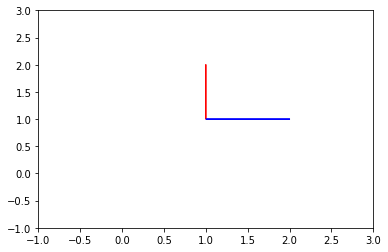

In [35]:
import matplotlib.pyplot as plt
import numpy as np

v1 = [0,1]
v2 = [1,0]

plt.arrow(1,1, v1[0], v1[1], color = "r")
plt.arrow(1,1, v2[0], v2[1], color = "b")


plt.xlim(-1,3)
plt.ylim(-1,3)

plt.show()

A synonym for orthogonal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [37]:
a = [-5, 3, 7]

b = [6, -8, 2]

np.dot(a,b)

-40

Since the dot product is not 0, the vectors are not orthogonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [52]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2 )

print(np.dot(c,c))

print( np.matmul(c,c.transpose()))

665.0
665
665


All of them are the same value

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

The linear combination of scalars and vectors are:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0\\1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [59]:
f = np.array([4,12,11,9,2])

norm = np.linalg.norm(f)

f_unit = ( f/norm )

print( f_unit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

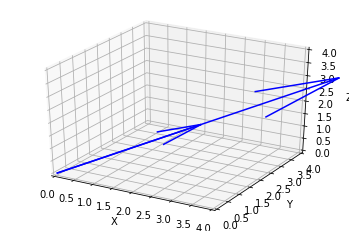

In [104]:
# Plot 2 vectors that are linearly dependent

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dependent1 = np.array([0,0,0, 2, 3, 1])
dependent2 = 2 * dependent1

# plot
X, Y, Z, U, V, W = zip(*[dependent1, dependent2])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, color = ['b'])

ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

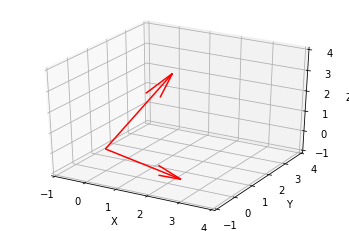

In [102]:
# Plot 2 vectors that are linearly independent

# create start and end points
independent1 = [0,0,0, 1,2,3]
independent2 = [0,0,0, 3,-1,0]

# plot
X, Y, Z, U, V, W = zip(*[independent1, independent2])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, colors=['r'])

ax.set_xlim([-1, 4])
ax.set_ylim([-1, 4])
ax.set_zlim([-1, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

We know that:
\begin{align}
h = \begin{bmatrix} 4 \\ 8 \end{bmatrix} = 4 \begin{bmatrix} 1 \\ 2 \end{bmatrix} = 4 g
\end{align}

Since the 2 vectors are linearly dependent, then the space occupied is just the line defined by 1x + 2y = 0, or y = 0.5x .

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [114]:
l = np.array([1,2,3])

m = np.array([-1,0,7])

n = np.array([4,8,2])

# See if we can create n using l and m. 
l + (-3*m)

array([  4,   2, -18])

Based on the above, we can't create n using factors of l and m. Therefore, the 3 vectors are all linearly independent. So they span all of 3D space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



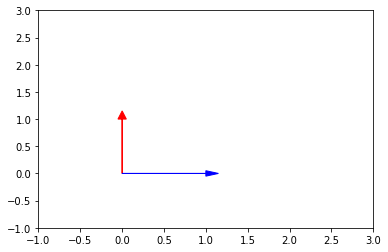

In [128]:
import matplotlib.pyplot as plt
import numpy as np

fig , ax = plt.subplots()

v1 = [0,1]
v2 = [1,0]

ax.arrow(0,0, v1[0], v1[1], head_width = 0.1, color = "r")
ax.arrow(0,0, v2[0], v2[1], head_width = 0.1, color = "b")


ax.set_xlim(-1,3)
ax.set_ylim(-1,3)

plt.show()

## 6.2 What does it mean to form a basis?

A basis refers to the space that is occcupied by all linear combinations of a set of linearly independent vectors. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Based on my answer from 5.2, the rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

How many linearly independent vectors are inside the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# moved to tomorrow's assignment

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

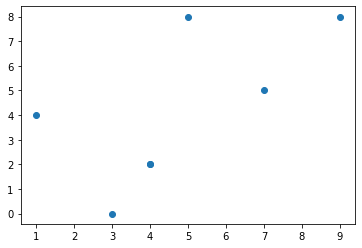

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()